In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pca
from sklearn.decomposition import PCA

In [2]:
RAW_DIR = "data/raw"

In [3]:
dataset = pd.read_csv(f"{RAW_DIR}/fetal_health.csv")

In [6]:
dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [7]:
dataset.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
# check fetal_health distribution
dataset["fetal_health"].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


A redução da mortalidade infantil é refletida em vários dos Objetivos de Desenvolvimento Sustentável das Nações Unidas e é um indicador-chave do progresso humano. A ONU espera que até 2030, os países acabem com as mortes evitáveis de recém-nascidos e crianças menores de 5 anos, com todos os países visando reduzir a mortalidade infantil para pelo menos tão baixa quanto 25 por 1.000 nascidos vivos.

Paralelamente à noção de mortalidade infantil está, é claro, a mortalidade materna, que representa 295.000 mortes durante e após a gravidez e o parto (até 2017). A grande maioria dessas mortes (94%) ocorreu em áreas de baixos recursos, e a maioria poderia ter sido evitada.

À luz do mencionado acima, Cardiotocogramas (CTGs) são uma opção simples e acessível para avaliar a saúde fetal, permitindo que profissionais de saúde ajam para evitar a mortalidade infantil e materna. O equipamento em si funciona enviando pulsos de ultrassom e lendo sua resposta, assim, iluminando a frequência cardíaca fetal (FHR), movimentos fetais, contrações uterinas e mais.


Este conjunto de dados contém 2126 registros de características extraídas de exames de Cardiotocograma (CTG), que foram então classificados por obstetras especializados em 3 classes:

- Normal
- Suspeito
- Patológico

**Características**

- '**baseline value**' Baseline do FHR (batimentos por minuto)
- '**accelerations**' Número de acelerações por segundo
- '**fetal_movement**' Número de movimentos fetais por segundo
- '**uterine_contractions**' Número de contrações uterinas por segundo
- '**light_decelerations**' Número de desacelerações leves por segundo
- '**severe_decelerations**' Número de desacelerações graves por segundo
- '**prolongued_decelerations**' Número de desacelerações prolongadas por segundo
- '**abnormal_short_term_variability**' Porcentagem de tempo com variabilidade de curto prazo anormal
- '**mean_value_of_short_term_variability**' Valor médio da variabilidade de curto prazo
- '**percentage_of_time_with_abnormal_long_term_variability**' Porcentagem de tempo com variabilidade de longo prazo anormal
- '**mean_value_of_long_term_variability**' Valor médio da variabilidade de longo prazo
- '**histogram_width**' Largura do histograma do FHR
- '**histogram_min**' Mínimo (baixa frequência) do histograma do FHR
- '**histogram_max**' Máximo (alta frequência) do histograma do FHR
- '**histogram_number_of_peaks**' Número de picos no histograma
- '**histogram_number_of_zeroes**' Número de zeros no histograma
- '**histogram_mode**' Modo do histograma
- '**histogram_mean**' Média do histograma
- '**histogram_median**' Mediana do histograma
- '**histogram_variance**' Variância do histograma
- '**histogram_tendency**' Tendência do histograma

**Alvo**

- '**fetal_health**' Marcado como 1 (Normal), 2 (Suspeito) e 3 (Patológico)

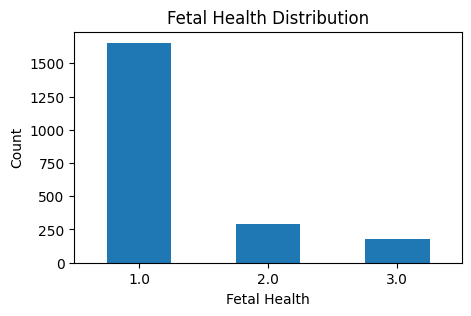

In [10]:
# plot fetal_health distribution

plt.figure(figsize=(5, 3))

dataset["fetal_health"].value_counts().plot(kind="bar")

plt.title("Fetal Health Distribution")

plt.xlabel("Fetal Health")

plt.ylabel("Count")

# rotate x-axis labels
plt.xticks(rotation=0)


plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

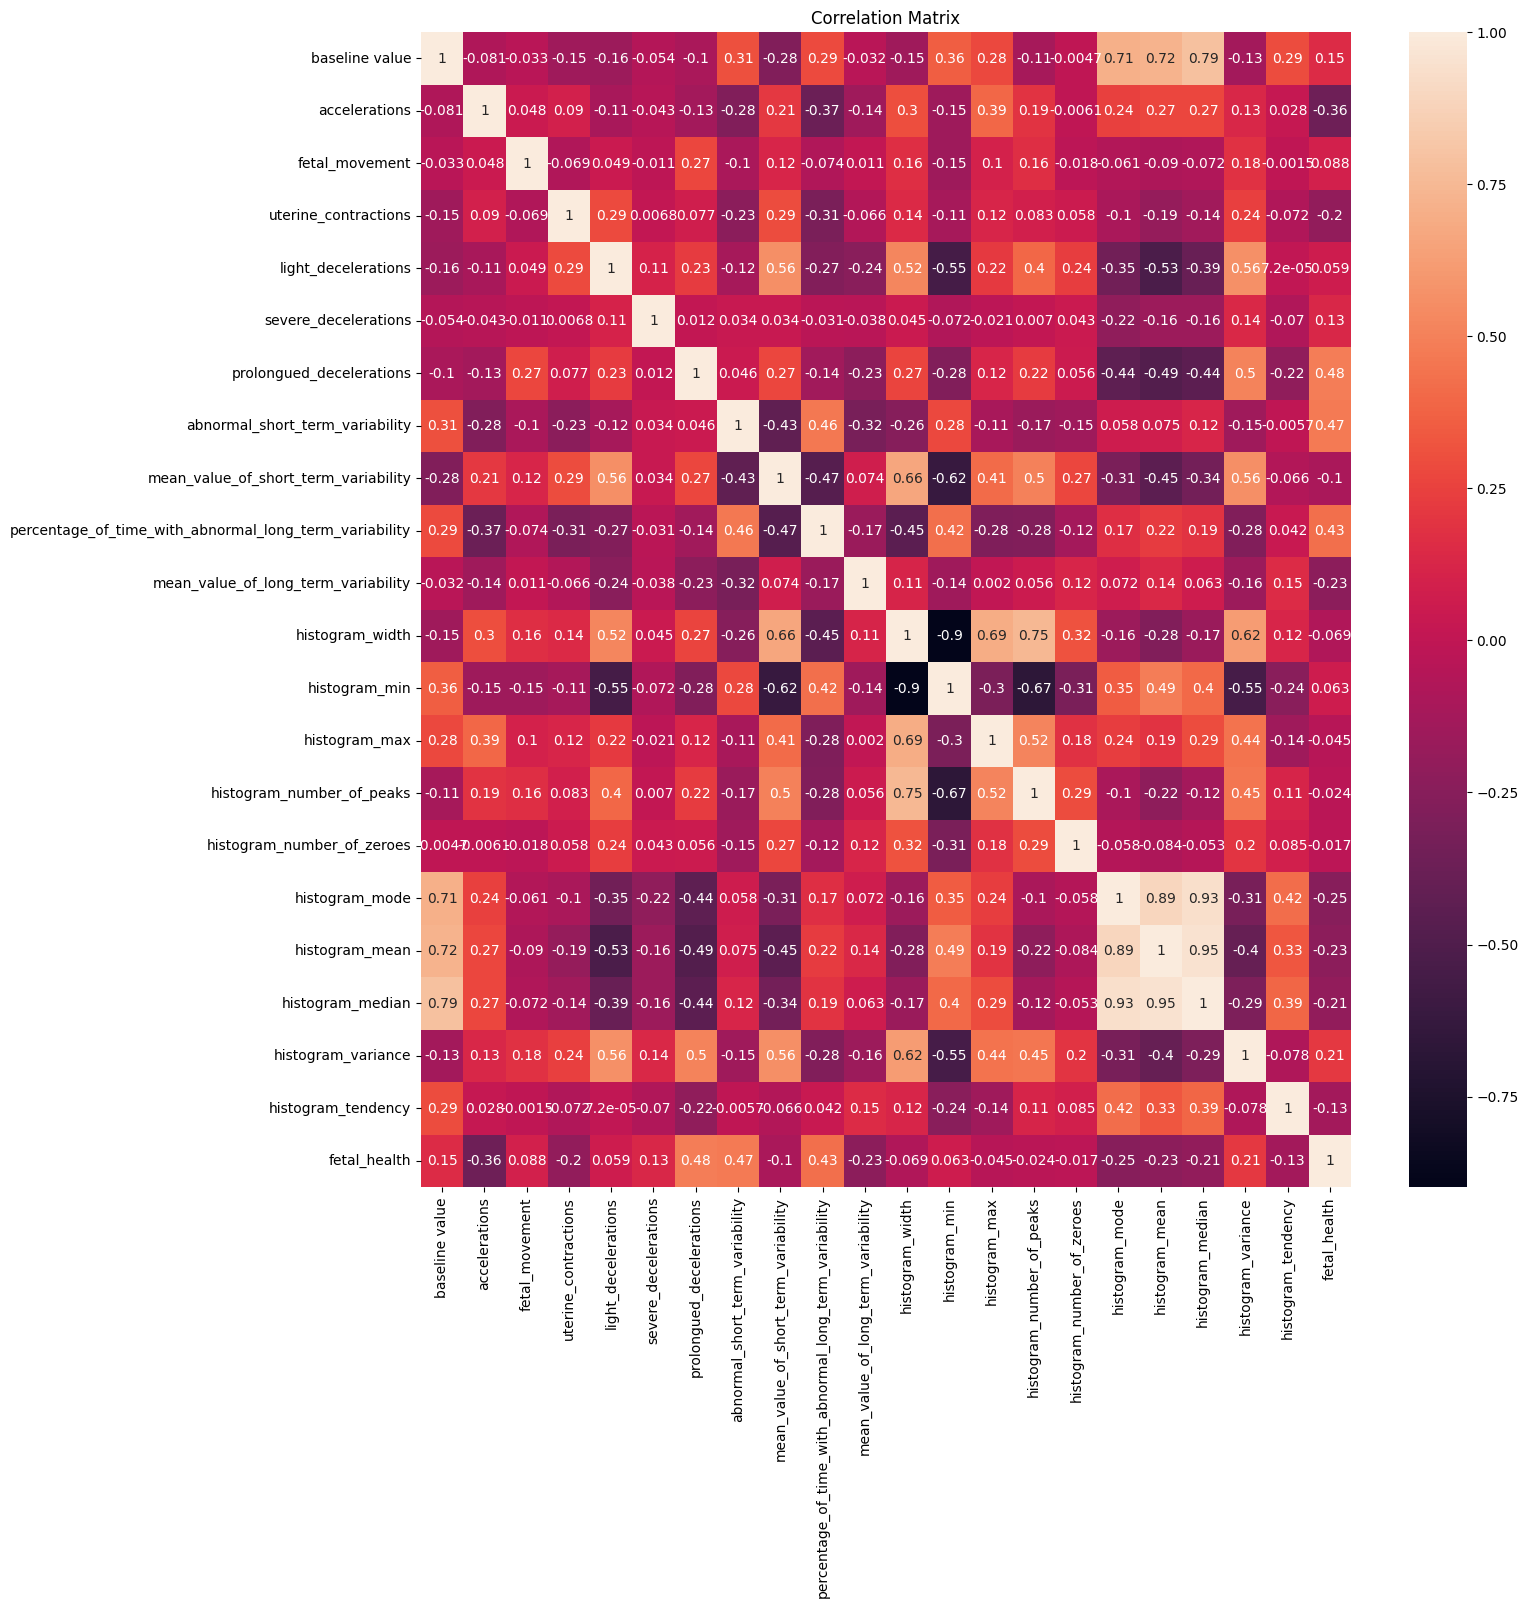

In [12]:
# plot corr matrix
plt.figure(figsize=(15, 15))

corr_matrix = dataset.corr()


sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation Matrix")

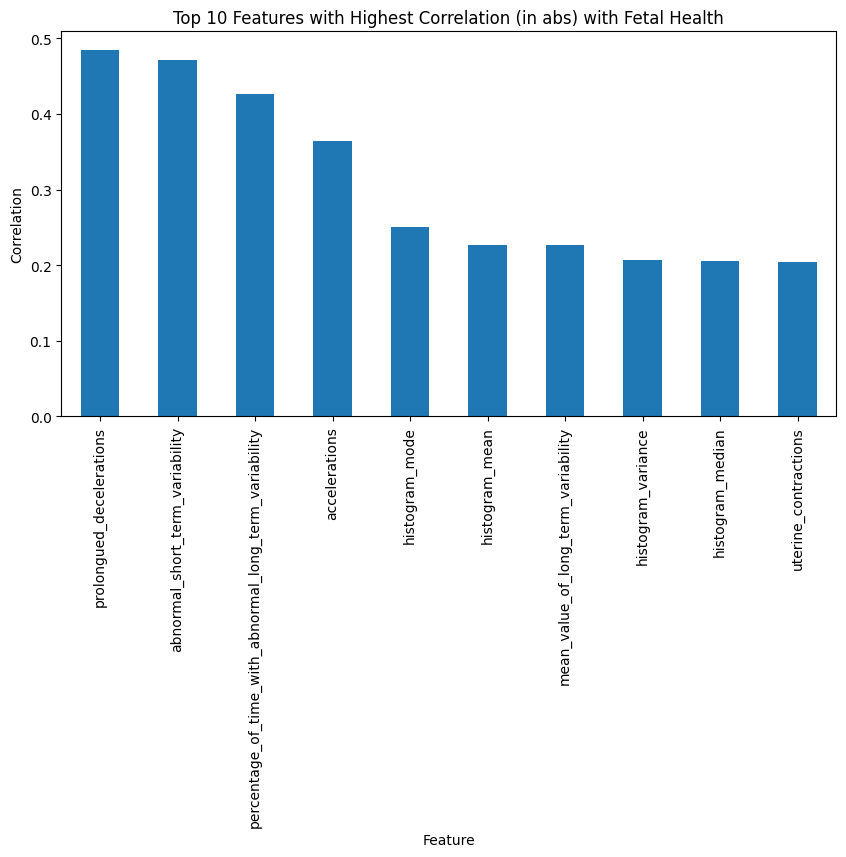

In [21]:
# get top 10 features with highest correlation with fetal_health, in absolute value

top_10_corr = corr_matrix["fetal_health"].abs().sort_values(ascending=False).head(11)

top_10_corr = top_10_corr.drop("fetal_health")

# plot top 10 features with highest correlation with fetal_health

plt.figure(figsize=(10, 5))

top_10_corr.plot(kind="bar")

plt.title("Top 10 Features with Highest Correlation (in abs) with Fetal Health")

plt.xlabel("Feature")

plt.ylabel("Correlation")


plt.show()

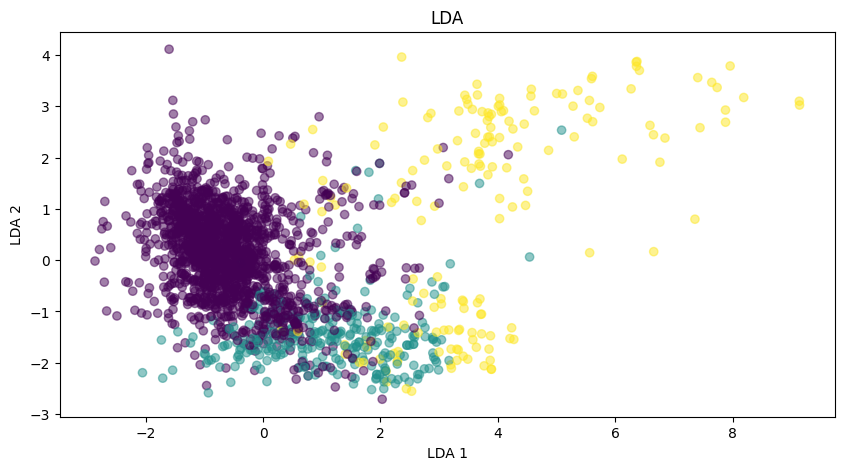

In [4]:
# LDA (Linear Discriminant Analysis)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = dataset.drop("fetal_health", axis=1)

y = dataset["fetal_health"]

lda = LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X, y)

X_lda

# plot LDA

plt.figure(figsize=(10, 5))

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap="viridis", alpha=0.5)

plt.title("LDA")

plt.xlabel("LDA 1")

plt.ylabel("LDA 2")

plt.show()

